In [48]:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns
  from sklearn.model_selection import train_test_split
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.preprocessing import LabelEncoder, StandardScaler
  from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
  
  # Load the dataset
  file_path = "Life Expectancy Data.csv"
  df = pd.read_csv(file_path)
  df["Year"] = df["Year"].apply(lambda x: x + 10 if 2000 <= x <= 2015 else x)
  df


,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2025,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2024,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2023,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2022,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2021,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2014,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2013,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2012,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2011,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [49]:
df.describe()

,Year,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2017.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2010.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2014.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2018.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2022.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2025.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expect                      2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   HepatitisB                       2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

In [51]:
  # Clean column names by removing spaces
  df.columns = df.columns.str.strip()
  
  # Check for missing values
  missing_values = df.isnull().sum()

In [56]:
  # Fill missing numerical values with median
  num_cols = df.select_dtypes(include=['float64', 'int64']).columns
  df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))
  
  # Fill missing categorical values with mode
  cat_cols = df.select_dtypes(include=['object']).columns
  df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [58]:

  # Encode categorical variables
  label_enc = LabelEncoder()
  df["Status"] = label_enc.fit_transform(df["Status"])
  
  # Save original dataset before dropping Country
  df_original = df.copy()

In [60]:
# Scale numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
  
# Define features and target variable
X = df.drop(columns=["Life_expect"])
y = df["Life_expect"]
  
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
# Display sample predictions
print(comparison_df.sample(10))

                  Country  Year  Life_expect
1657           Mauritania  2019         61.7
2386              Somalia  2016         51.5
464              Cambodia  2025         68.7
196            Bangladesh  2021         73.0
2029          Philippines  2019         68.0
1626                 Mali  2017         55.0
193            Bangladesh  2024         71.4
2846              Vanuatu  2021         71.2
2652  Trinidad and Tobago  2022         78.0
1101        Guinea-Bissau  2014         53.5


In [137]:
# Country-wise Life Expectancy Analysis
country_life_expectancy = df_original.groupby("Country")["Life_expect"].mean().sort_values(ascending=False)


C:\Users\prady\AppData\Local\Temp\ipykernel_9048\1724453728.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_life_expectancy.head(20).index, x=country_life_expectancy.head(20).values, palette="viridis")


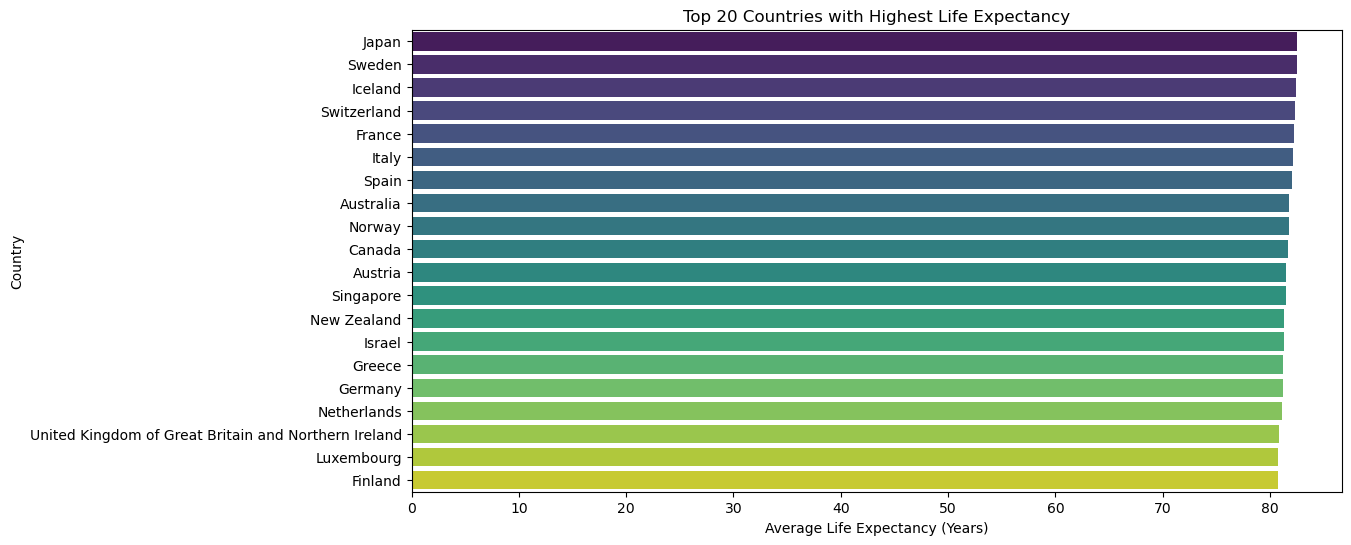

In [139]:
plt.figure(figsize=(12, 6))
sns.barplot(y=country_life_expectancy.head(20).index, x=country_life_expectancy.head(20).values, palette="viridis")
plt.xlabel("Average Life Expectancy (Years)")
plt.ylabel("Country")
plt.title("Top 20 Countries with Highest Life Expectancy")
plt.show()

C:\Users\prady\AppData\Local\Temp\ipykernel_9048\3161453553.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_life_expectancy.tail(20).index, x=country_life_expectancy.tail(20).values, palette="Reds")


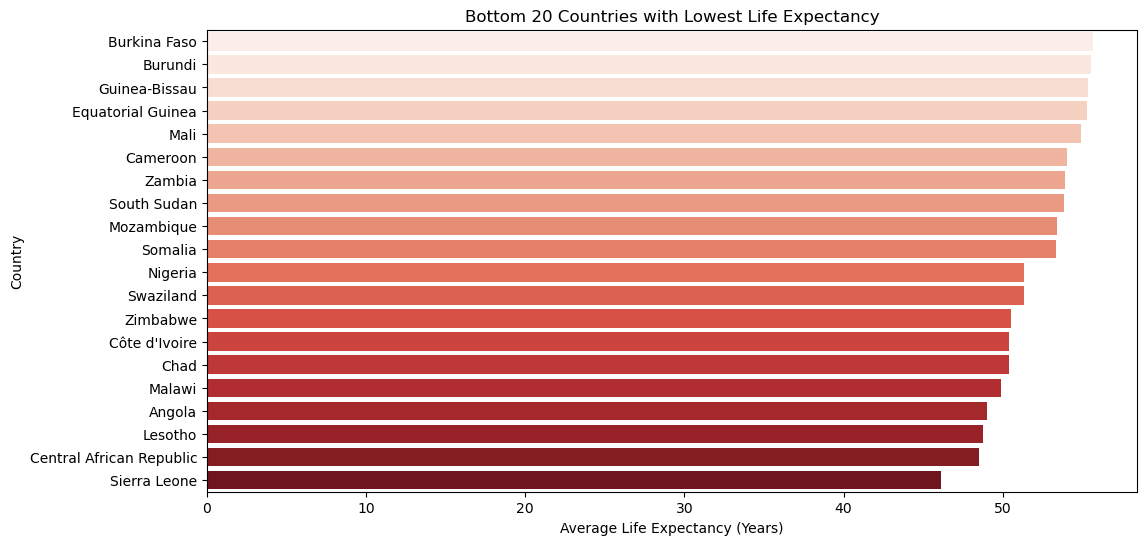

In [141]:
plt.figure(figsize=(12, 6))
sns.barplot(y=country_life_expectancy.tail(20).index, x=country_life_expectancy.tail(20).values, palette="Reds")
plt.xlabel("Average Life Expectancy (Years)")
plt.ylabel("Country")
plt.title("Bottom 20 Countries with Lowest Life Expectancy")
plt.show()

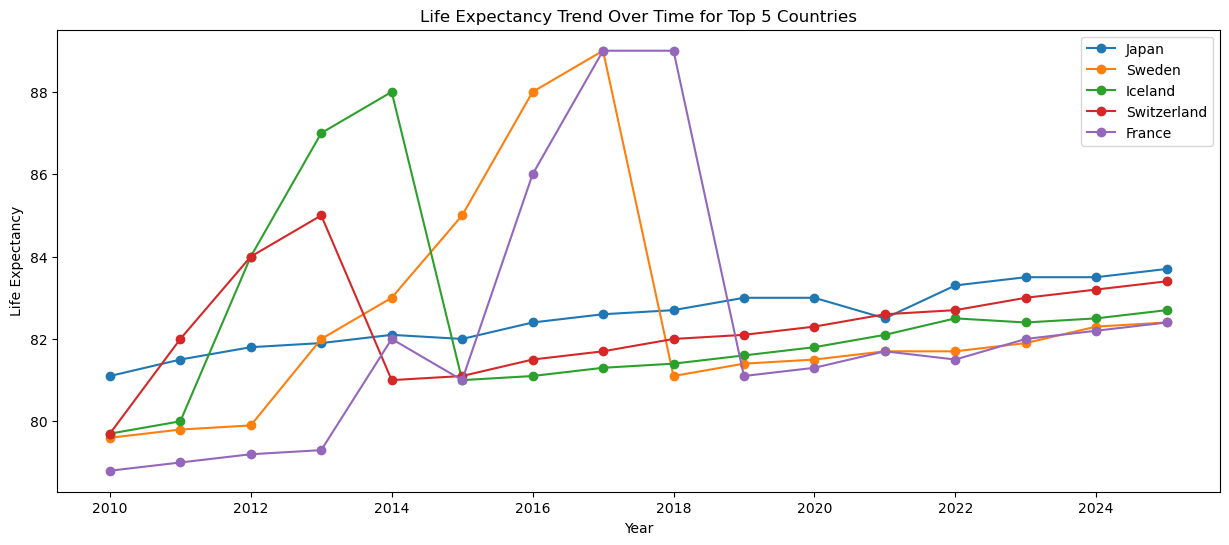

In [142]:
plt.figure(figsize=(15, 6))
top_countries = df_original.groupby("Country")["Life_expect"].mean().sort_values(ascending=False).head(5).index

for country in top_countries:
    subset = df_original[df_original["Country"] == country]
    plt.plot(subset["Year"], subset["Life_expect"], label=country, marker="o")

plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy Trend Over Time for Top 5 Countries")
plt.legend()
plt.show()


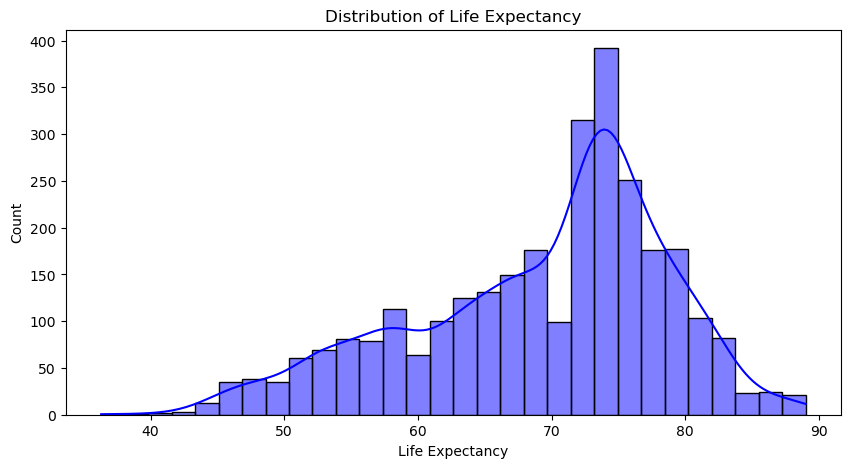

In [145]:
plt.figure(figsize=(10, 5))
sns.histplot(df_original["Life_expect"], bins=30, kde=True, color="blue")
plt.xlabel("Life Expectancy")
plt.ylabel("Count")
plt.title("Distribution of Life Expectancy")
plt.show()


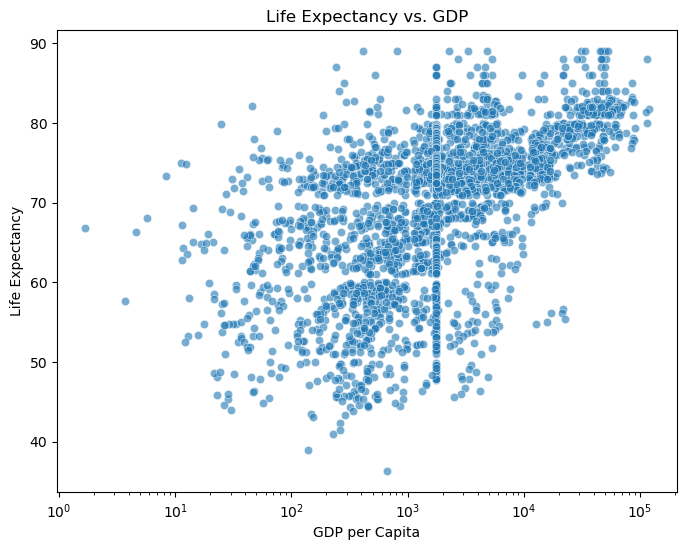

In [147]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_original["GDP"], y=df_original["Life_expect"], alpha=0.6)
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs. GDP")
plt.xscale("log")  # GDP is often skewed; log scale makes it clearer
plt.show()


C:\Users\prady\AppData\Local\Temp\ipykernel_9048\1745685202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_original["Status"], y=df_original["Life_expect"], palette=["red", "green"])


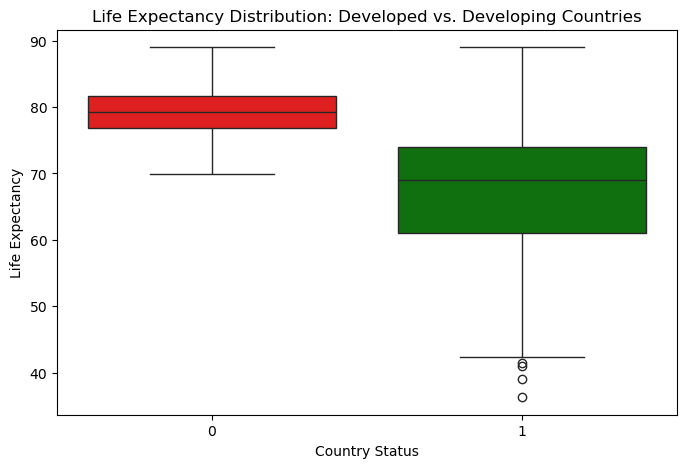

In [148]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_original["Status"], y=df_original["Life_expect"], palette=["red", "green"])
plt.xlabel("Country Status")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy Distribution: Developed vs. Developing Countries")
plt.show()


C:\Users\prady\AppData\Local\Temp\ipykernel_9048\1823664856.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10.index, x=top_10.values, palette="Blues_r", ax=axes[0])
C:\Users\prady\AppData\Local\Temp\ipykernel_9048\1823664856.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=bottom_10.index, x=bottom_10.values, palette="Reds_r", ax=axes[1])


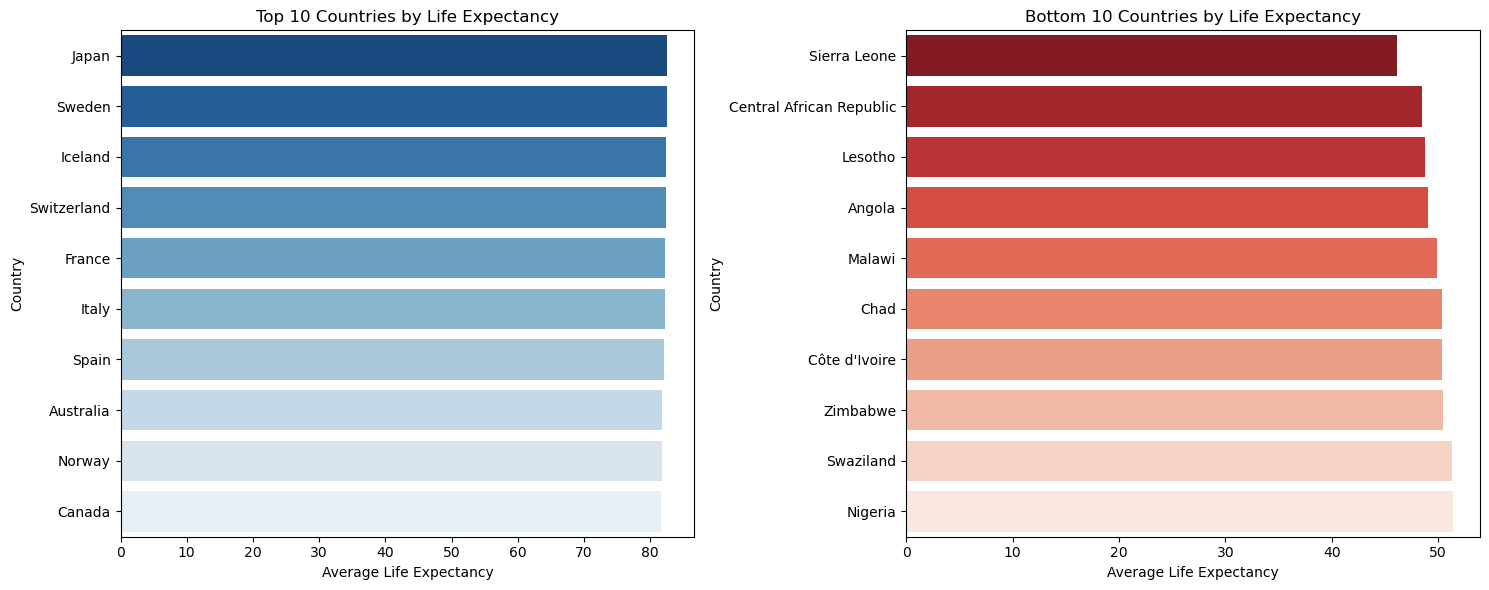

In [151]:
# Get top and bottom 10 countries
top_10 = df_original.groupby("Country")["Life_expect"].mean().sort_values(ascending=False).head(10)
bottom_10 = df_original.groupby("Country")["Life_expect"].mean().sort_values(ascending=True).head(10)

# Plot bar charts
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(y=top_10.index, x=top_10.values, palette="Blues_r", ax=axes[0])
axes[0].set_title("Top 10 Countries by Life Expectancy")
axes[0].set_xlabel("Average Life Expectancy")

sns.barplot(y=bottom_10.index, x=bottom_10.values, palette="Reds_r", ax=axes[1])
axes[1].set_title("Bottom 10 Countries by Life Expectancy")
axes[1].set_xlabel("Average Life Expectancy")

plt.tight_layout()
plt.show()


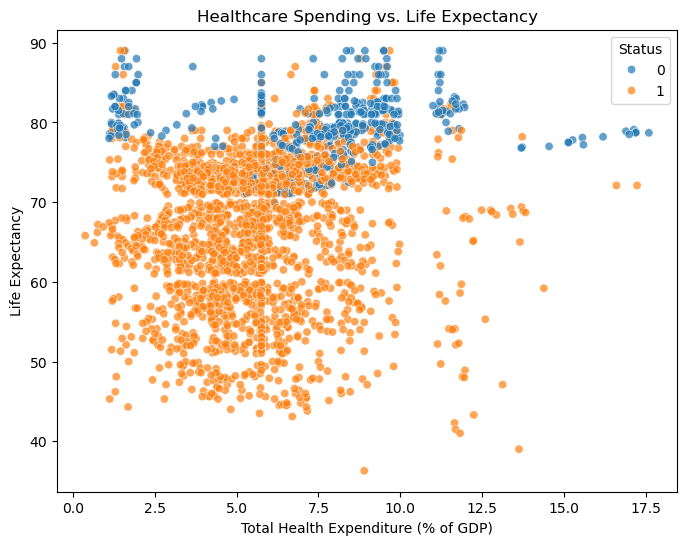

In [152]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_original["Total_expenditure"], y=df_original["Life_expect"], hue=df_original["Status"], alpha=0.7)
plt.xlabel("Total Health Expenditure (% of GDP)")
plt.ylabel("Life Expectancy")
plt.title("Healthcare Spending vs. Life Expectancy")
plt.legend(title="Status")
plt.show()


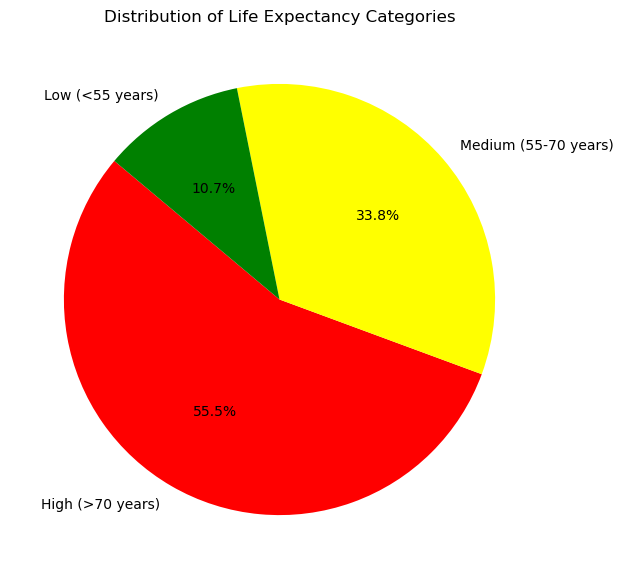

In [154]:
# Define life expectancy categories
bins = [0, 55, 70, 100]
labels = ["Low (<55 years)", "Medium (55-70 years)", "High (>70 years)"]
df_original["Life Expectancy Category"] = pd.cut(df_original["Life_expect"], bins=bins, labels=labels)

# Count occurrences of each category
category_counts = df_original["Life Expectancy Category"].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", colors=["red", "yellow", "green"], startangle=140)
plt.title("Distribution of Life Expectancy Categories")
plt.show()


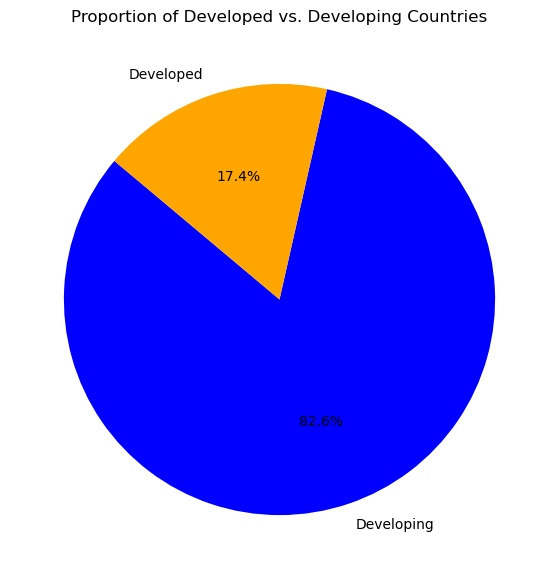

In [157]:




# Count developed vs. developing countries
status_counts = df_original["Status"].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=["Developing", "Developed"], autopct="%1.1f%%", colors=["blue", "orange"], startangle=140)
plt.title("Proportion of Developed vs. Developing Countries")
plt.show()


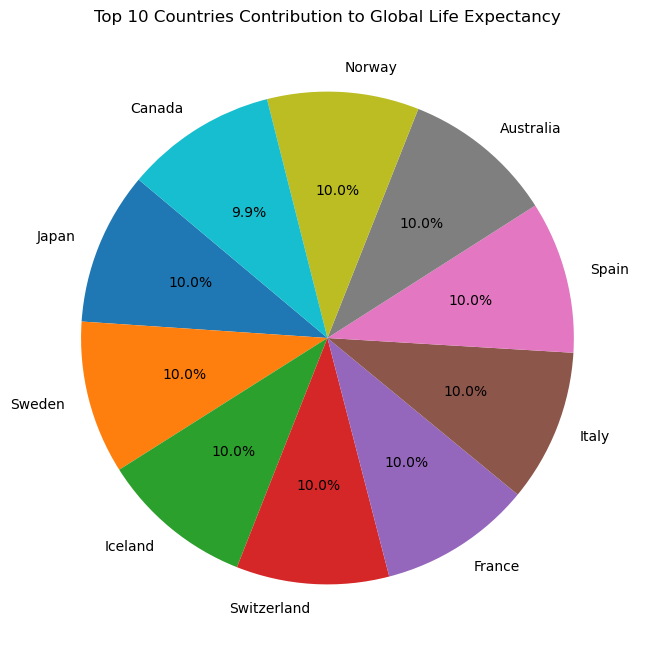

In [159]:
# Group by country and calculate average life expectancy
country_avg = df_original.groupby("Country")["Life_expect"].mean().reset_index()

# Select top 10 highest life expectancy countries
top_countries = country_avg.sort_values("Life_expect", ascending=False).head(10)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_countries["Life_expect"], labels=top_countries["Country"], autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Countries Contribution to Global Life Expectancy")
plt.show()


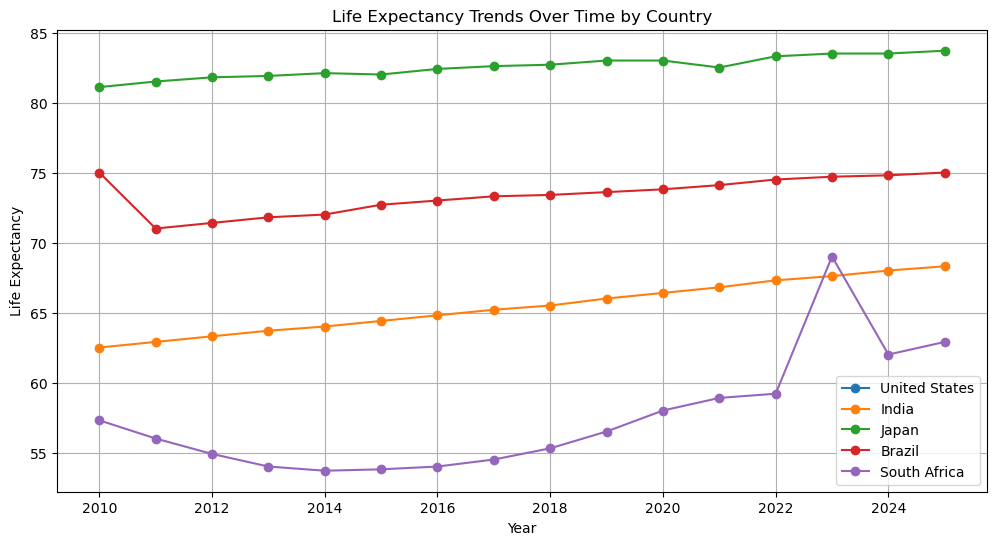

In [161]:
plt.figure(figsize=(12, 6))

# Select a few countries for comparison
selected_countries = ["United States", "India", "Japan", "Brazil", "South Africa"]

for country in selected_countries:
    subset = df_original[df_original["Country"] == country]
    plt.plot(subset["Year"], subset["Life_expect"], label=country, marker="o")

plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy Trends Over Time by Country")
plt.legend()
plt.grid(True)
plt.show()


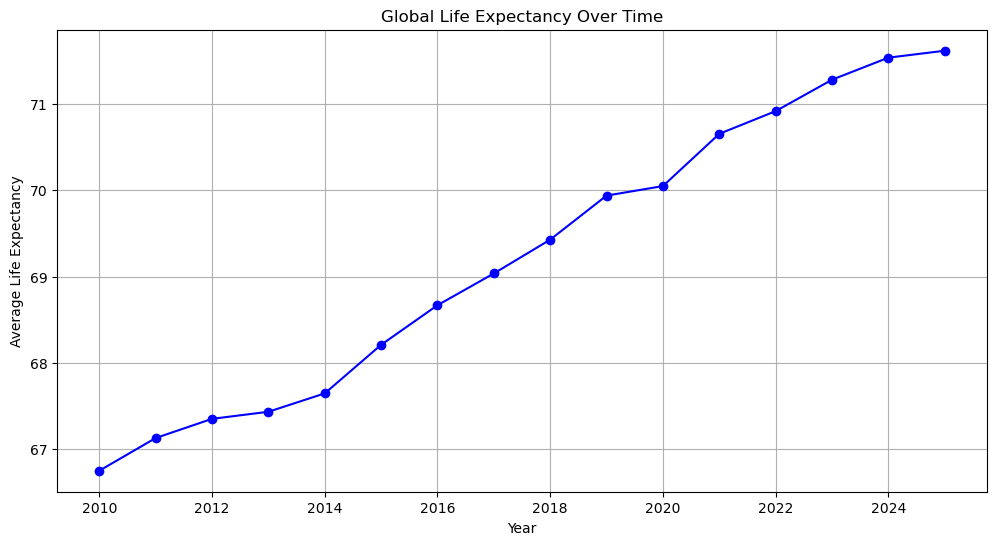

In [163]:
plt.figure(figsize=(12, 6))
global_trend = df_original.groupby("Year")["Life_expect"].mean()

plt.plot(global_trend.index, global_trend.values, marker="o", linestyle="-", color="blue")
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.title("Global Life Expectancy Over Time")
plt.grid(True)
plt.show()


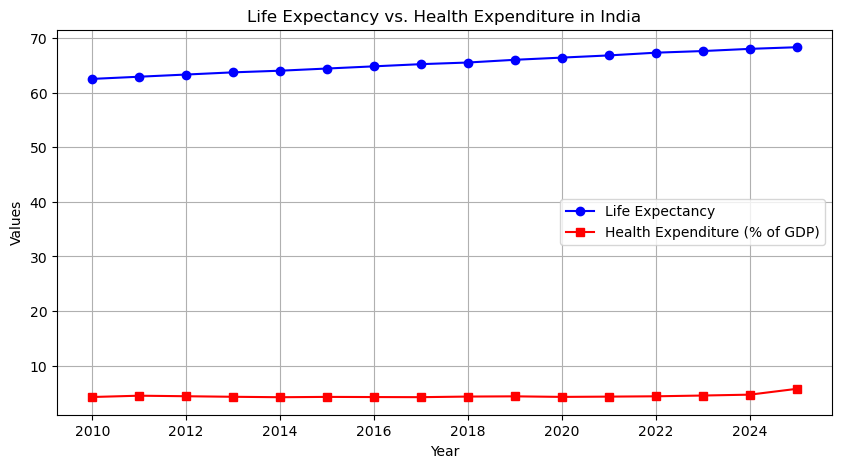

In [165]:
plt.figure(figsize=(10, 5))

# Choose a country
country_name = "India"
country_data = df_original[df_original["Country"] == country_name]

plt.plot(country_data["Year"], country_data["Life_expect"], marker="o", label="Life Expectancy", color="blue")
plt.plot(country_data["Year"], country_data["Total_expenditure"], marker="s", label="Health Expenditure (% of GDP)", color="red")

plt.xlabel("Year")
plt.ylabel("Values")
plt.title(f"Life Expectancy vs. Health Expenditure in {country_name}")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\prady\AppData\Local\Temp\ipykernel_9048\4173473175.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  population_distribution = df_original.groupby("Life Expectancy Category")["Population"].sum()


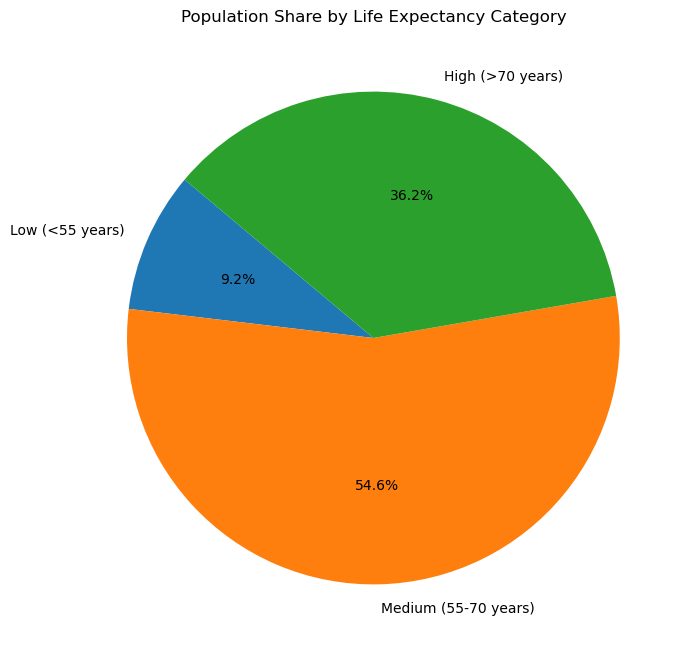

In [167]:
# Define life expectancy categories
df_original["Life Expectancy Category"] = pd.cut(df_original["Life_expect"], bins=bins, labels=labels)

# Sum population for each category
population_distribution = df_original.groupby("Life Expectancy Category")["Population"].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(population_distribution, labels=population_distribution.index, autopct="%1.1f%%", startangle=140)
plt.title("Population Share by Life Expectancy Category")
plt.show()


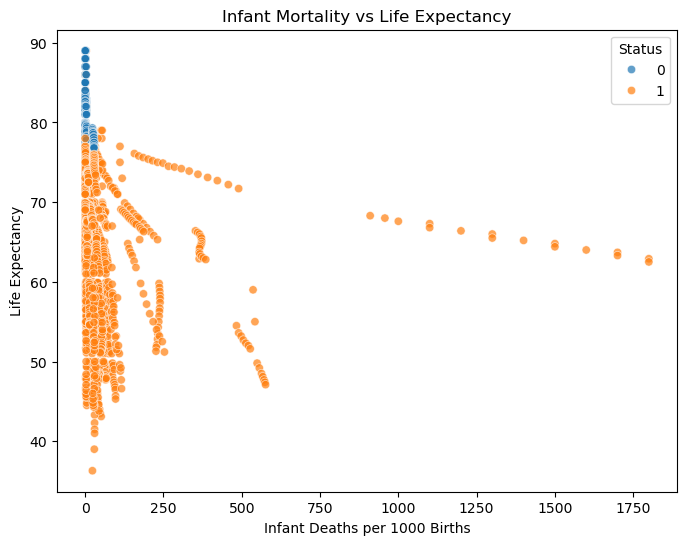

In [169]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_original["infant_deaths"], y=df_original["Life_expect"], hue=df_original["Status"], alpha=0.7)
plt.xlabel("Infant Deaths per 1000 Births")
plt.ylabel("Life Expectancy")
plt.title("Infant Mortality vs Life Expectancy")
plt.show()


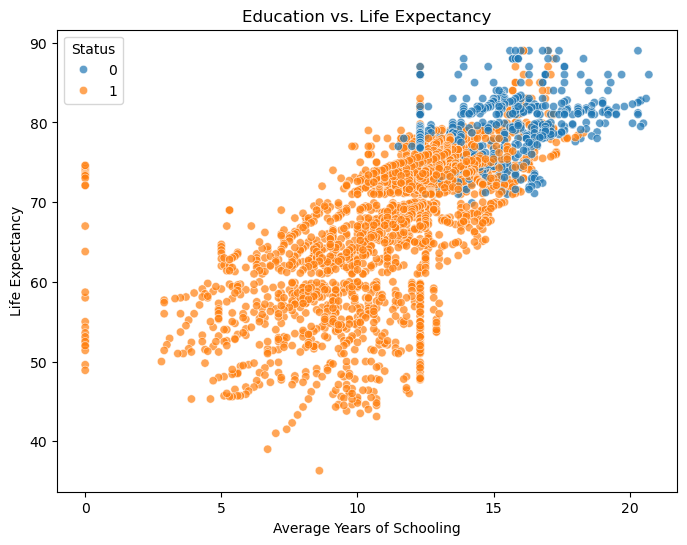

In [171]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_original["Schooling"], y=df_original["Life_expect"], hue=df_original["Status"], alpha=0.7)
plt.xlabel("Average Years of Schooling")
plt.ylabel("Life Expectancy")
plt.title("Education vs. Life Expectancy")
plt.show()


In [174]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import io
import os

df = pd.read_csv('Life Expectancy Data.csv',float_precision='round_trip')


In [176]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()

In [178]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [182]:
# Fill missing numerical values with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))
df

,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.0,71.0,65.0,1154,...,6.0,8.0,65.0,0.0,584.0,33736494.0,17.0,17.0,0.0,10.0
1,Afghanistan,2014,Developing,60.0,271.0,64,0.0,74.0,62.0,492,...,58.0,8.0,62.0,0.0,613.0,327582.0,18.0,18.0,0.0,10.0
2,Afghanistan,2013,Developing,60.0,268.0,66,0.0,73.0,64.0,430,...,62.0,8.0,64.0,0.0,632.0,31731688.0,18.0,18.0,0.0,10.0
3,Afghanistan,2012,Developing,60.0,272.0,69,0.0,78.0,67.0,2787,...,67.0,9.0,67.0,0.0,670.0,3696958.0,18.0,18.0,0.0,10.0
4,Afghanistan,2011,Developing,59.0,275.0,71,0.0,7.0,68.0,3013,...,68.0,8.0,68.0,0.0,64.0,2978599.0,18.0,18.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.0,723.0,27,4.0,0.0,68.0,31,...,67.0,7.0,65.0,34.0,454.0,12777511.0,9.0,9.0,0.0,9.0
2934,Zimbabwe,2003,Developing,44.0,715.0,26,4.0,0.0,7.0,998,...,7.0,7.0,68.0,37.0,453.0,12633897.0,10.0,10.0,0.0,10.0
2935,Zimbabwe,2002,Developing,45.0,73.0,25,4.0,0.0,73.0,304,...,73.0,7.0,71.0,40.0,57.0,125525.0,1.0,1.0,0.0,10.0
2936,Zimbabwe,2001,Developing,45.0,686.0,25,2.0,0.0,76.0,529,...,76.0,6.0,75.0,42.0,549.0,12366165.0,2.0,2.0,0.0,10.0


In [184]:
# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [186]:
df.dropna(subset = ["Country","Year","Status","Life_expect","Adult_Mortality"
                       ,"infant_deaths","Alcohol","percentage_expenditure","HepatitisB","Measles"
                       ,"BMI","under_five_deaths","Polio","Total_expenditure","Diphtheria"
                       ,"HIV_AIDS","GDP","Population","thinness_1-19_years","thinness_5-9_years"
                       ,"Income_composition_of_resources","Schooling"], inplace=True)

In [188]:
#TURN Country into number 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

In [190]:
a = 0
tempStatus = []
for i in df.Status:
    if i == "Developing":
        tempStatus.append(0) 
        a = a+1
    elif i == "Developed":
        tempStatus.append(1)
        a = a+1

df.Status = tempStatus

In [192]:
#To see our dataset after formating
print('Dataset after clearning:')
print('')
df

Dataset after clearning:



,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,0,2015,0,65.0,263.0,62,0.0,71.0,65.0,1154,...,6.0,8.0,65.0,0.0,584.0,33736494.0,17.0,17.0,0.0,10.0
1,0,2014,0,60.0,271.0,64,0.0,74.0,62.0,492,...,58.0,8.0,62.0,0.0,613.0,327582.0,18.0,18.0,0.0,10.0
2,0,2013,0,60.0,268.0,66,0.0,73.0,64.0,430,...,62.0,8.0,64.0,0.0,632.0,31731688.0,18.0,18.0,0.0,10.0
3,0,2012,0,60.0,272.0,69,0.0,78.0,67.0,2787,...,67.0,9.0,67.0,0.0,670.0,3696958.0,18.0,18.0,0.0,10.0
4,0,2011,0,59.0,275.0,71,0.0,7.0,68.0,3013,...,68.0,8.0,68.0,0.0,64.0,2978599.0,18.0,18.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,0,44.0,723.0,27,4.0,0.0,68.0,31,...,67.0,7.0,65.0,34.0,454.0,12777511.0,9.0,9.0,0.0,9.0
2934,192,2003,0,44.0,715.0,26,4.0,0.0,7.0,998,...,7.0,7.0,68.0,37.0,453.0,12633897.0,10.0,10.0,0.0,10.0
2935,192,2002,0,45.0,73.0,25,4.0,0.0,73.0,304,...,73.0,7.0,71.0,40.0,57.0,125525.0,1.0,1.0,0.0,10.0
2936,192,2001,0,45.0,686.0,25,2.0,0.0,76.0,529,...,76.0,6.0,75.0,42.0,549.0,12366165.0,2.0,2.0,0.0,10.0


In [194]:
    corr = pd.DataFrame(df.drop('Life_expect', axis=1)).corr() #axis 1 = columns
    corr.style.background_gradient(cmap='coolwarm')

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
Country,1.000000,0.001342,0.031635,0.039569,-0.030528,-0.059968,-0.032982,-0.014544,-0.024593,0.021286,-0.026509,0.020327,0.054091,-0.003503,0.089432,-0.034408,-0.020070,0.002372,0.014061,0.005295,-0.021530
Year,0.001342,1.000000,-0.001864,-0.079535,-0.037415,-0.062142,0.031401,0.021302,-0.082493,0.108357,-0.042937,0.091388,0.084782,0.131373,-0.140189,0.091480,0.014027,-0.045668,-0.051102,0.164257,0.199218
Status,0.031635,-0.001864,1.000000,-0.314894,-0.112252,0.576975,0.454258,0.127008,-0.076955,0.309120,-0.115195,0.218628,0.285653,0.215281,-0.148661,0.445981,-0.037606,-0.362530,-0.363278,0.261984,0.491229
Adult_Mortality,0.039569,-0.079535,-0.314894,1.000000,0.078890,-0.188118,-0.242623,-0.123287,0.031293,-0.378279,0.094280,-0.270002,-0.108883,-0.270301,0.526430,-0.281434,-0.005292,0.296223,0.300607,-0.416783,-0.431151
infant_deaths,-0.030528,-0.037415,-0.112252,0.078890,1.000000,-0.113089,-0.085612,-0.167421,0.501128,-0.226729,0.996629,-0.170896,-0.131094,-0.175376,0.023636,-0.102829,0.551667,0.464381,0.468949,-0.102160,-0.190688
Alcohol,-0.059968,-0.062142,0.576975,-0.188118,-0.113089,1.000000,0.341934,0.092514,-0.049706,0.315271,-0.109714,0.212843,0.291804,0.214487,-0.045952,0.312569,-0.028270,-0.411265,-0.403235,0.318441,0.493464
percentage_expenditure,-0.032982,0.031401,0.454258,-0.242623,-0.085612,0.341934,1.000000,0.039529,-0.056596,0.226960,-0.087852,0.146146,0.171680,0.142503,-0.098159,0.901820,-0.016884,-0.249597,-0.250094,0.195159,0.389940
HepatitisB,-0.014544,0.021302,0.127008,-0.123287,-0.167421,0.092514,0.039529,1.000000,-0.073021,0.112431,-0.170549,0.364890,0.054538,0.449151,-0.085770,0.076660,-0.125006,-0.096322,-0.101560,0.132333,0.140567
Measles,-0.024593,-0.082493,-0.076955,0.031293,0.501128,-0.049706,-0.056596,-0.073021,1.000000,-0.176066,0.507809,-0.136669,-0.101779,-0.142385,0.032298,-0.069254,0.237188,0.225556,0.219817,-0.067256,-0.119451
BMI,0.021286,0.108357,0.309120,-0.378279,-0.226729,0.315271,0.226960,0.112431,-0.176066,1.000000,-0.236978,0.281329,0.227295,0.280306,-0.245940,0.273489,-0.069666,-0.534695,-0.540136,0.443063,0.498357


In [196]:
X = df[["Country","Year","Status","Life_expect","Adult_Mortality"
                       ,"infant_deaths","Alcohol","percentage_expenditure","HepatitisB","Measles"
                       ,"BMI","under_five_deaths","Polio","Total_expenditure","Diphtheria"
                       ,"HIV_AIDS","GDP","Population","thinness_1-19_years","thinness_5-9_years"
                       ,"Income_composition_of_resources","Schooling"]]
y = df.Life_expect

X_temp = np.array(X).reshape(-1,22)
y_temp = np.array(y).reshape(-1,1)

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.2)

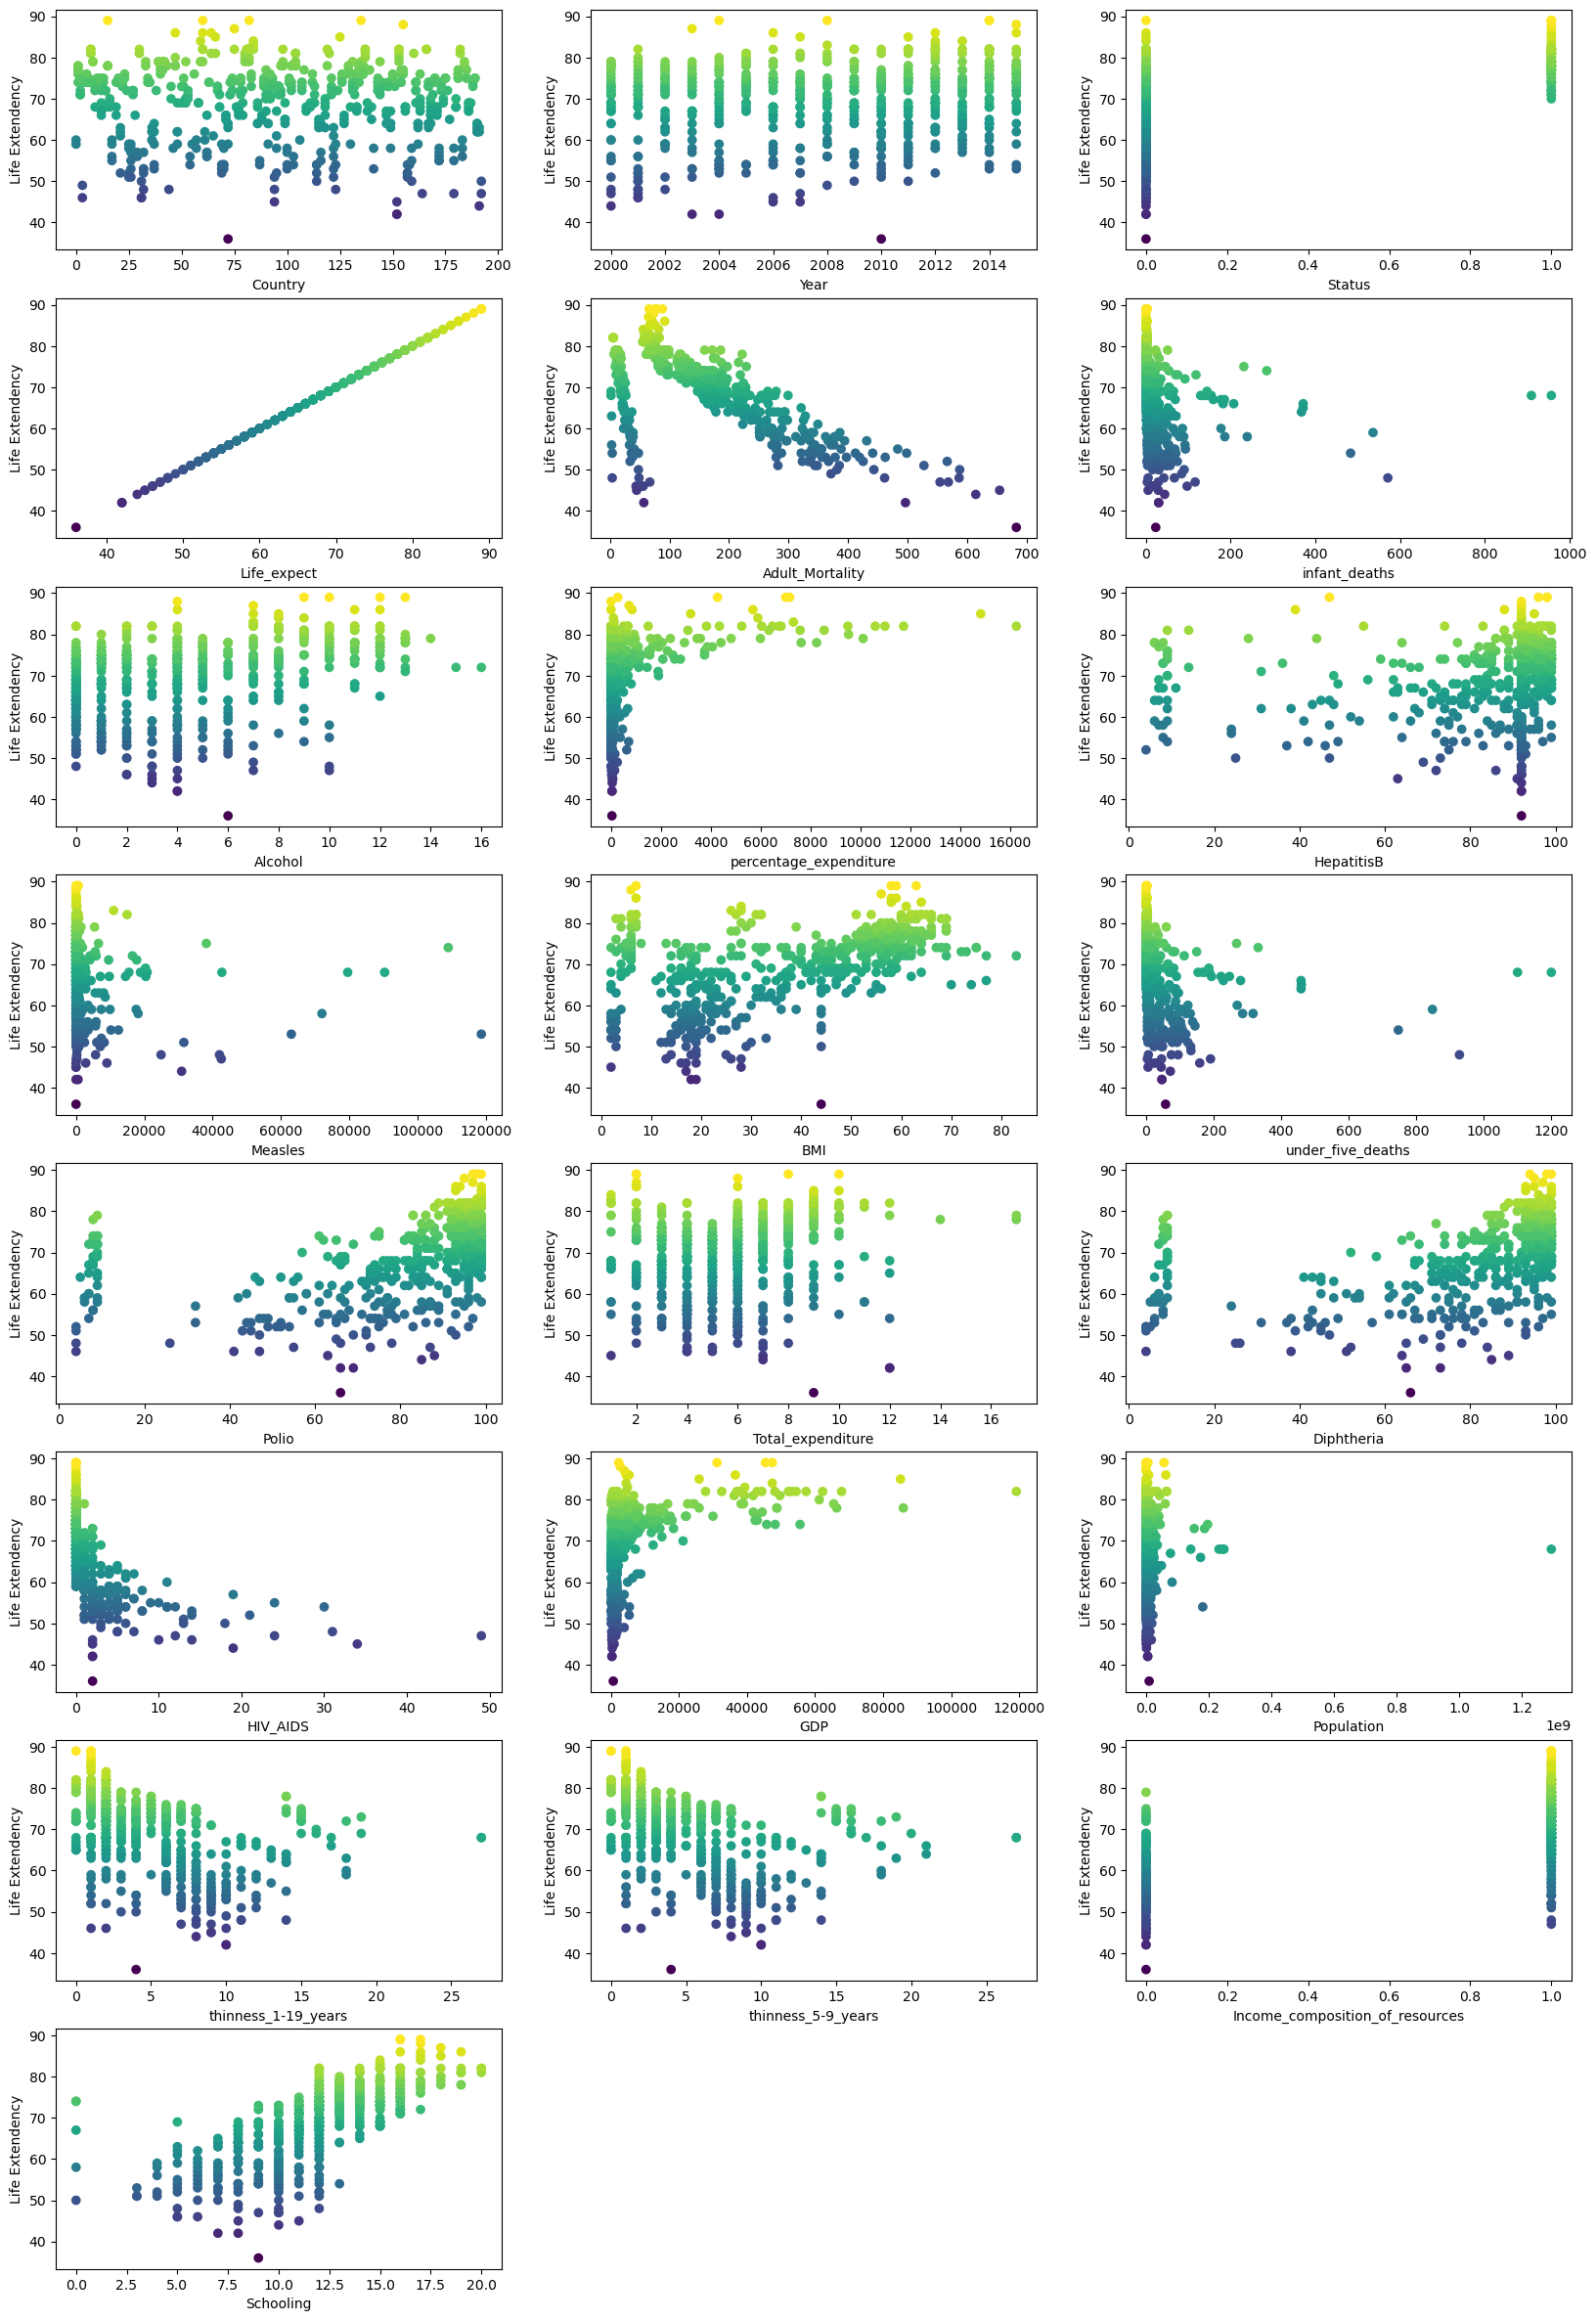

In [200]:
plt_name = ["Country","Year","Status","Life_expect","Adult_Mortality"
                       ,"infant_deaths","Alcohol","percentage_expenditure","HepatitisB","Measles"
                       ,"BMI","under_five_deaths","Polio","Total_expenditure","Diphtheria"
                       ,"HIV_AIDS","GDP","Population","thinness_1-19_years","thinness_5-9_years"
                       ,"Income_composition_of_resources","Schooling"]
plt.figure(figsize=(20,30))
for i in range(0,22):
  plt.subplot(8,3,i+1)
  # plt.title(plt_name[i]+'vs Life Extendency')
  plt.xlabel(plt_name[i])
  plt.ylabel('Life Extendency')
  plt.scatter(X_test[:,i],y_test,c=y_test,label='data')
  # plt.scatter(X_test[:,i],y_pred,color='black',label = 'pred')
plt.show()


In [202]:
from sklearn.ensemble import ExtraTreesClassifier

Feature importance score:

[0.03881506 0.05072756 0.00911173 0.24934267 0.06893155 0.03588465
 0.03744829 0.03775049 0.03208753 0.03054725 0.0453288  0.03760585
 0.03583005 0.03642447 0.03636887 0.02182449 0.0392662  0.03157907
 0.03541579 0.03648373 0.01086312 0.04236279]


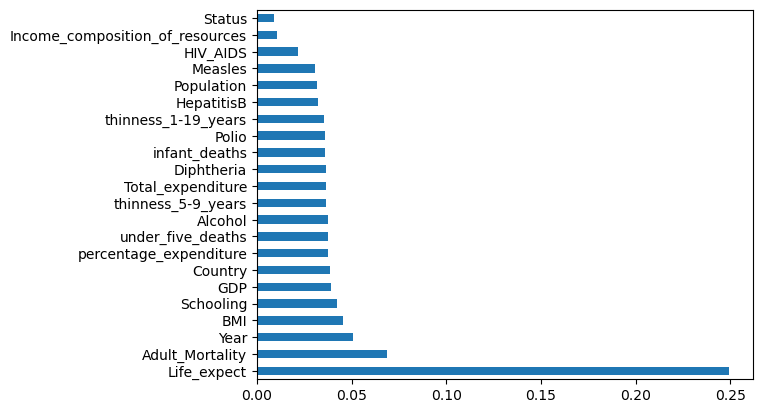

In [204]:
#____________________________________________SEE WHICH FEATURE IS MORE RELEVANT____________________________________________

print('Feature importance score:')
print('')

X = df.iloc[:,0:22]         #columns
y = df.iloc[:,3]            #target column

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.show()

In [206]:
#____________________________________________SEE WHICH FEATURE HAVE BEST FITNESS____________________________________________
print('Feature fitness score:')
print('')

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,0:22]            #columns
y = df.iloc[:,3]               #target column

bestfeatures = SelectKBest(score_func=chi2, k=22)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#connect both data
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  
print(featureScores.nlargest(22,'Score'))

Feature fitness score:

                            Feature         Score
17                       Population  2.410899e+10
16                              GDP  2.903878e+07
9                           Measles  1.062924e+07
7            percentage_expenditure  5.487679e+06
11                under_five_deaths  1.447081e+05
4                   Adult_Mortality  1.400086e+05
5                     infant_deaths  9.545068e+04
15                         HIV_AIDS  2.523231e+04
10                              BMI  1.035580e+04
14                       Diphtheria  4.957549e+03
12                            Polio  4.584069e+03
3                       Life_expect  3.840838e+03
19               thinness_5-9_years  3.420796e+03
18              thinness_1-19_years  3.269415e+03
6                           Alcohol  2.596723e+03
0                           Country  2.389383e+03
21                        Schooling  1.471299e+03
8                        HepatitisB  1.161871e+03
2                         

In [208]:
hf_X = df[['Status','Adult_Mortality','infant_deaths','percentage_expenditure','Measles','BMI','under_five_deaths','Total_expenditure','HIV_AIDS','GDP','Income_composition_of_resources','Schooling']]
lf_X = df[["Country","Year","Status","Adult_Mortality"
                       ,"infant_deaths","Alcohol","percentage_expenditure","HepatitisB","Measles"
                       ,"BMI","under_five_deaths","Polio","Total_expenditure","Diphtheria"
                       ,"HIV_AIDS","GDP","Population","thinness_1-19_years","thinness_5-9_years"
                       ,"Income_composition_of_resources","Schooling"]]

yd = df.Life_expect


hf_X = np.array(hf_X).reshape(-1,12)
lf_X = np.array(lf_X).reshape(-1,21)
yd = np.array(yd).reshape(-1,1)

In [210]:
from sklearn.decomposition import PCA

In [212]:
    X = hf_X
    y = yd

In [214]:
X = StandardScaler().fit_transform(X)

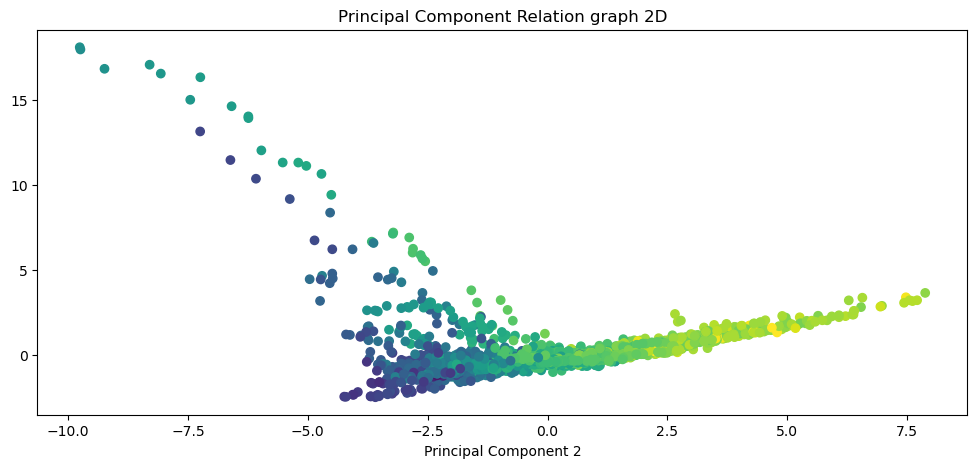

In [216]:
pca = PCA(n_components=2)
pca.fit(X)
X_PCA = pca.transform(X)

plt.figure(figsize=(12,5))
plt.title('Principal Component Relation graph 2D')
plt.xlabel("Principal Component 1")
plt.xlabel("Principal Component 2")
plt.scatter(X_PCA[:,0],X_PCA[:,1],c = y,label='data')
# plt.scatter(X_test[:,i],y_pred,color='black',label = 'pred')
plt.show()

In [218]:
print(pca.explained_variance_ratio_)
print(pca.components_)
print(pca.mean_)

[0.3207332  0.18269974]
[[ 0.32448314 -0.30802128 -0.22928776  0.32391911 -0.16280057  0.33348204
  -0.23677805  0.17184395 -0.19680715  0.34075738  0.32085264  0.40153901]
 [ 0.1391209  -0.1712838   0.56946778  0.19541156  0.42704974  0.00286904
   0.56593856 -0.03692701 -0.13830577  0.19398353  0.12405041  0.11247949]]
[ 2.66030296e-17  5.32060592e-17 -1.93476579e-17  2.41845724e-17
 -7.25537171e-18 -1.12458261e-16  4.83691447e-18 -1.45107434e-16
 -7.73906315e-17 -2.41845724e-18 -3.62768585e-17  2.17661151e-16]


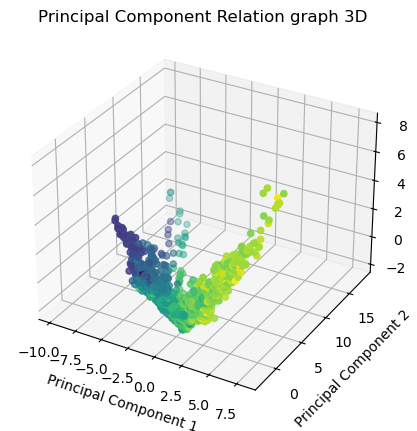

In [220]:
pca = PCA(n_components=3)
pca.fit(X)
X_PCA = pca.transform(X)

plt.figure(figsize=(12,5))
ax = plt.axes(projection='3d')
plt.title('Principal Component Relation graph 3D')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.scatter3D(X_PCA[:,0], X_PCA[:,1], X_PCA[:,2], c=y)

In [222]:
X = hf_X
y = yd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [224]:
temp_X_train = X_train
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [226]:
#****Set Train****
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [228]:
print('This is regration accuracy score:')
r2_score(y_pred, y_test)

This is regration accuracy score:


0.7594688759060253

In [230]:
scores = cross_val_score(reg, X_test, y_test, cv=5,scoring= 'r2')

In [232]:
scores

array([0.80769314, 0.8791119 , 0.79730697, 0.78237143, 0.73211035])

In [234]:
print("%0.2f r2 accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.80 r2 accuracy with a standard deviation of 0.05


In [236]:
#____________________________________________Display Data in Lineat Regression____________________________________________
pca = PCA(n_components=1)
pca.fit(X)
X_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

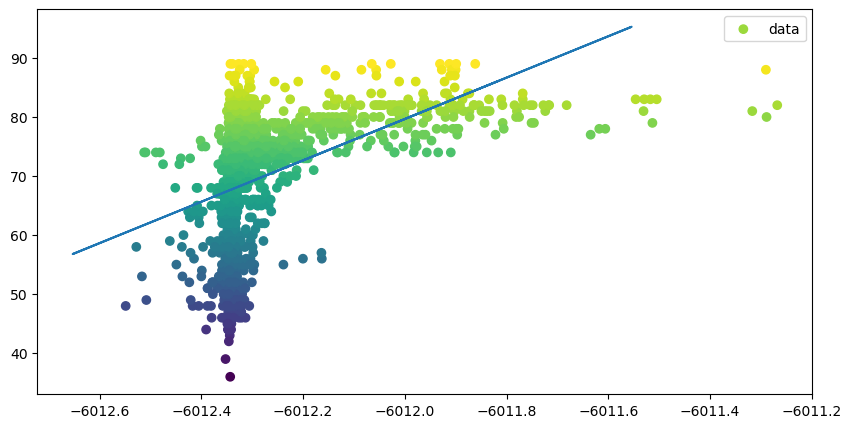

In [238]:
plt.figure(figsize=(10,5))
plt.scatter(X_PCA,y_train,c=y_train,label='data')

X_test_PCA = np.array(X_test_PCA).reshape(-1)
m, b = np.polyfit(X_test_PCA, y_pred, 1)
plt.plot(X_test_PCA, m*X_test_PCA + b)
# plt.plot(X_test_PCA,y_pred,color='black',label = 'pred')
plt.legend()
plt.show()

In [240]:
#____________________________________________Linear Regration Predict 01____________________________________________
print('Prediction of life expectancy:')
temp_data = [[0,263,62,71.27962,1154,19.1,83,8.16,0.1,584.2592,0.479,10.1]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
#the correct life expectancy is 65

Prediction of life expectancy:
[[64.23317514]]


In [242]:
#____________________________________________Linear Regration Predict 02____________________________________________
print('Prediction of life expectancy:')
temp_data = [[0,281,77,56.76221682,2861,16.2,106,9.42,0.1,445.8932979,0.434,8.9]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
#the correct life expectancy is 58.6

Prediction of life expectancy:
[[62.58184517]]


In [244]:
#____________________________________________Linear Regration Predict 03____________________________________________
print('Prediction of life expectancy:')
temp_data = [[0,295,87,11.08905273,798,13.4,122,8.82,0.1,198.7285436,0.373,6.5]]
scaler.fit(temp_X_train)
abc =reg.predict(temp_data)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
#the correct life expectancy is 56.7

Prediction of life expectancy:
[[60.0840659]]


In [246]:
X = lf_X
y = yd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [248]:
#Normalization
temp_X_train = X_train
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [250]:
#****Set Train****
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [252]:
#____________________________________________SEE THE ACCURACY SCORE____________________________________________
print('This is regration accuracy score:')
r2_score(y_pred, y_test)

This is regration accuracy score:


0.7411490392476728

In [254]:
scores = cross_val_score(reg, X_test, y_test, cv=5,scoring= 'r2')

In [256]:
scores

array([0.71371   , 0.84232273, 0.8421658 , 0.74965237, 0.72788634])

In [258]:
print("%0.2f r2 accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.78 r2 accuracy with a standard deviation of 0.06


In [260]:
pca = PCA(n_components=1)
pca.fit(X)
X_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

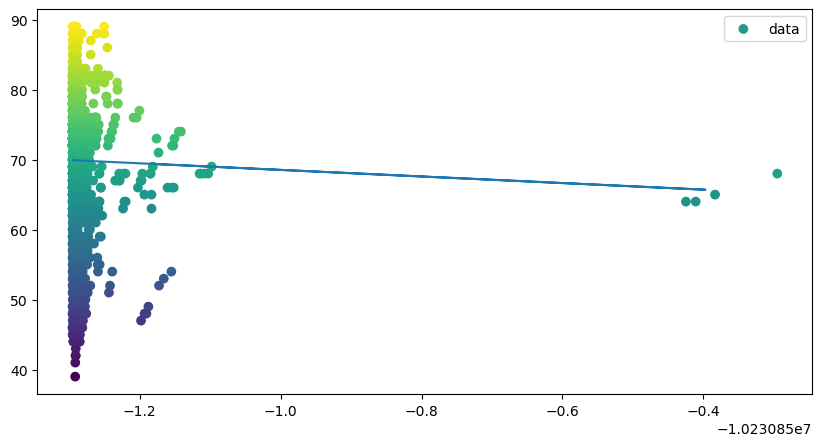

In [262]:
plt.figure(figsize=(10,5))
plt.scatter(X_PCA,y_train,c=y_train,label='data')

X_test_PCA = np.array(X_test_PCA).reshape(-1)
m, b = np.polyfit(X_test_PCA, y_pred, 1)
plt.plot(X_test_PCA, m*X_test_PCA + b)
# plt.plot(X_test_PCA,y_pred,color='black',label = 'pred')
plt.legend()
plt.show()

In [264]:
print('Prediction of life expectancy:')
temp_data = [[0,2015,0,263,62,0.01,71.27962362,65,1154,19.1,83,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
# the correct life expectancy is 65

Prediction of life expectancy:
[[60.89893127]]


In [266]:
#____________________________________________Linear Regration Predict 02____________________________________________
print('Prediction of life expectancy:')
temp_data = [[0,2009,0,281,77,0.01,56.76221682,63,2861,16.2,106,63,9.42,63,0.1,445.8932979,284331,18.6,18.7,0.434,8.9]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
#the correct life expectancy is 58.6

Prediction of life expectancy:
[[60.62442506]]


In [268]:
#____________________________________________Linear Regration Predict 03____________________________________________
print('Prediction of life expectancy:')
temp_data = [[0,2003,0,295,87,0.01,11.08905273,65,798,13.4,122,41,8.82,41,0.1,198.7285436,2364851,19.7,19.9,0.373,6.5]]
scaler.fit(temp_X_train)
abc =reg.predict(temp_data)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
#the correct life expectancy is 56.7

Prediction of life expectancy:
[[56.78415467]]


In [270]:
from sklearn.svm import SVR #SVR for Regression, SVC for Classicif

In [272]:
X = hf_X
y = df.Life_expect

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# temp_X_train= X_train

In [274]:
#Normalization
temp_X_train = X_train
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [276]:
reg = SVR()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


In [278]:
r2_score(y_test, y_pred)

0.8144827269390964

In [280]:
scores = cross_val_score(reg, X_test, y_test, cv=5,scoring= 'r2')

In [282]:
scores

array([0.70523589, 0.78861672, 0.75223951, 0.73596491, 0.78023479])

In [284]:
print("%0.2f r2 accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.75 r2 accuracy with a standard deviation of 0.03


In [286]:
#____________________________________________SVR Predict 01____________________________________________

print('Prediction of life expectancy:')
temp_data = [[0,263,62,71.27962,1154,19.1,83,8.16,0.1,584.2592,0.479,10.1]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
#the correct life expectancy is 65

Prediction of life expectancy:
[62.11798706]


In [288]:
#____________________________________________SVR Predict 02____________________________________________
print('Prediction of life expectancy:')
temp_data = [[0,281,77,56.76221682,2861,16.2,106,9.42,0.1,445.8932979,0.434,8.9]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
#the correct life expectancy is 58.6

Prediction of life expectancy:
[60.31605602]


In [290]:
#____________________________________________SVR Predict 02____________________________________________
print('Prediction of life expectancy:')
temp_data = [[0,281,77,56.76221682,2861,16.2,106,9.42,0.1,445.8932979,0.434,8.9]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
#the correct life expectancy is 58.6

Prediction of life expectancy:
[60.31605602]
